# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
df = pd.read_csv("/Users/usuario/Downloads/TP2/Base Airbnb NY.csv")

#cantidad de filas
num_filas = len(df)
print(f"Cantidad de filas en el DataFrame: {num_filas}")

#DUPLICADOS
duplicados = df.duplicated()
num_duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {num_duplicados}")
#Eliminar filas duplicadas
df_final = df.drop_duplicates()
#Se eliminaron un total de N filas

#cantidad de filas sin duplicados 
num_filas = len(df_final)
print(f"Cantidad de filas en el DataFrame, luego de eliminar filas duplicadas: {num_filas}. Hay 10 filas menos")

#FILAS INNECESARIAS
columnas_a_eliminar = ['id', 'name', 'host_id', 'host_name', 'last_review']
df_final = df_final.drop(columns=columnas_a_eliminar)


Cantidad de filas en el DataFrame: 48905
Total de filas duplicadas: 10
Cantidad de filas en el DataFrame, luego de eliminar filas duplicadas: 48895. Hay 10 filas menos


C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2138729993.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[variable], shade=True, color='lightcoral')  # Gráfico de densidad
C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2138729993.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[variable], shade=True, color='lightcoral')  # Gráfico de densidad
C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2138729993.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[variable], shade=True, color='lightcoral')  # Gráfico de densidad
C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\213

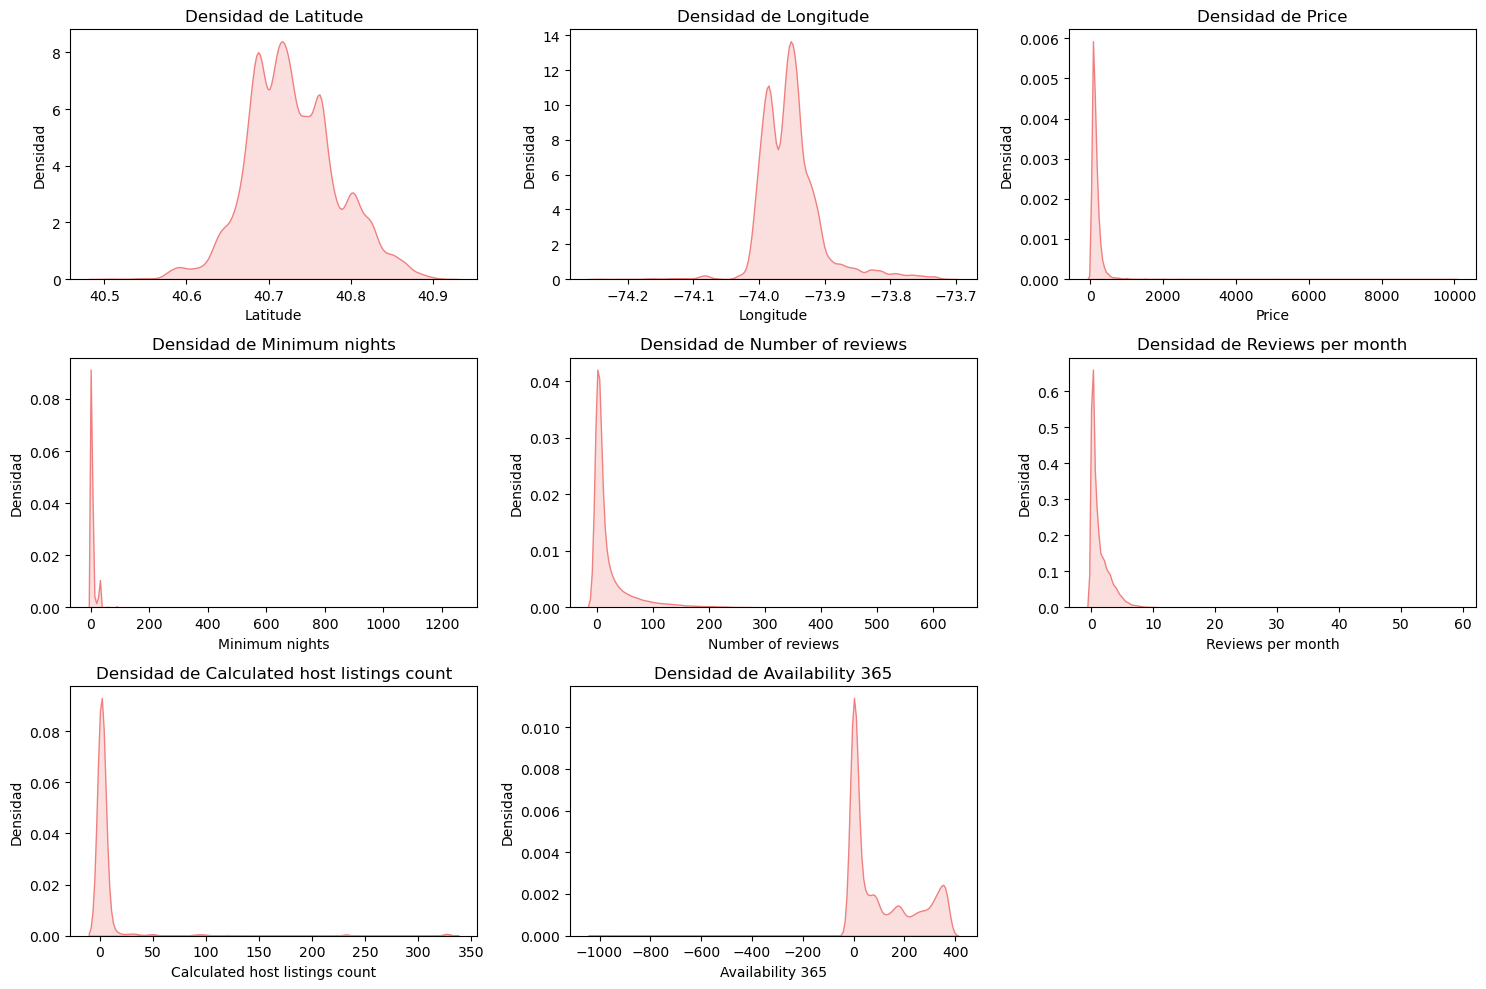

c:\ProgramData\anaconda3\envs\Datos\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2138729993.py:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[variable], shade=True, color='lightcoral')  # Gráfico de densidad
C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2138729993.py:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[variable], shade=True, color='lightcoral')  # Gráfico de densidad
C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2138729993.py:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in

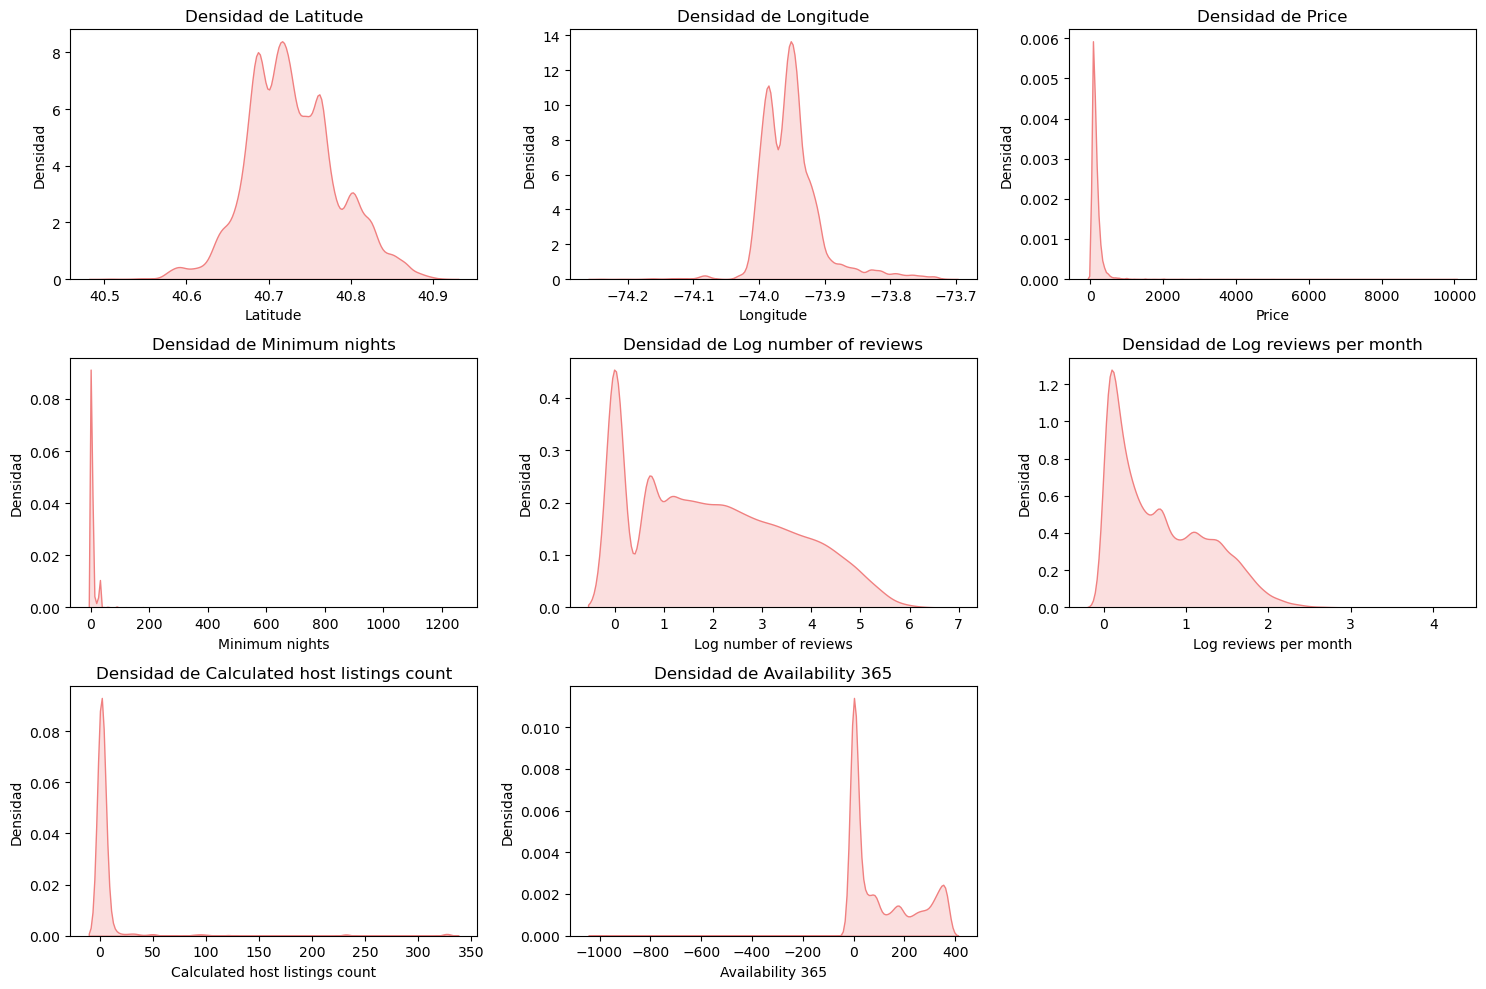

In [2]:
#outliers
#veo los graficos de densidad para ver la distribución de los datos 

import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables numéricas
variables_numericas = ['latitude', 'longitude', 'price', 'minimum_nights', 
                        'number_of_reviews', 'reviews_per_month', 
                        'calculated_host_listings_count', 'availability_365']

# Crear gráficos de densidad (KDE) para cada variable
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables_numericas):
    plt.subplot(3, 3, i + 1)  # Crea una cuadrícula de 3x3
    sns.kdeplot(df_final[variable], shade=True, color='lightcoral')  # Gráfico de densidad
    
    # Etiquetas mejoradas
    variable_titulo = variable.replace('_', ' ').capitalize()  # Reemplaza guiones bajos y capitaliza solo la primera letra
    
    plt.title(f'Densidad de {variable_titulo}')  # Título mejorado
    plt.xlabel(variable_titulo)  # Etiqueta del eje X mejorada
    plt.ylabel('Densidad')  # Etiqueta del eje Y

plt.tight_layout()  
plt.show()

# 1. Transformaciones logarítmicas
# Para evitar log(0), se sumará 1 a cada variable
df_final['log_number_of_reviews'] = np.log1p(df_final['number_of_reviews'])
df_final['log_reviews_per_month'] = np.log1p(df_final['reviews_per_month'])
df_final['log_availability_365'] = np.log1p(df_final['availability_365'])

#veo las distribuciones luego de las transformaciones logarítmicas
# Definir las variables numéricas
variables_numericas2 = ['latitude', 'longitude', 'price', 'minimum_nights', 
                        'log_number_of_reviews', 'log_reviews_per_month', 
                        'calculated_host_listings_count', 'availability_365']

# Crear gráficos de densidad (KDE) para cada variable
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables_numericas2):
    plt.subplot(3, 3, i + 1)  # Crea una cuadrícula de 3x3
    sns.kdeplot(df_final[variable], shade=True, color='lightcoral')  # Gráfico de densidad
    
    # Etiquetas mejoradas
    variable_titulo = variable.replace('_', ' ').capitalize()  # Reemplaza guiones bajos y capitaliza solo la primera letra
    
    plt.title(f'Densidad de {variable_titulo}')  # Título mejorado
    plt.xlabel(variable_titulo)  # Etiqueta del eje X mejorada
    plt.ylabel('Densidad')  # Etiqueta del eje Y


plt.tight_layout()  
plt.show()


In [56]:
#cantidad de filas
num_filas = len(df_final)
print(f"Cantidad de filas en el DataFrame antes de eliminar outliers: {num_filas}")


Cantidad de filas en el DataFrame antes de eliminar outliers: 48895


In [3]:
#filtrar outliers
def remove_outliers_iqr(df_final, column):
    # Calcular Q1, Q3 y IQR
    Q1 = df_final[column].quantile(0.25)
    Q3 = df_final[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    return df_final[(df_final[column] >= lower_bound) & (df_final[column] <= upper_bound)]

# 3. Filtrar outliers para cada variable transformada

df_final = remove_outliers_iqr(df_final, 'log_number_of_reviews')
df_final = remove_outliers_iqr(df_final, 'log_reviews_per_month') 
df_final= remove_outliers_iqr(df_final, 'latitude')
df_final = remove_outliers_iqr(df_final, 'longitude')
df_final= remove_outliers_iqr(df_final, 'price')

df_final = df_final[df_final['price'] != 0]

# Mostrar el DataFrame resultante sin outliers
print(df_final)

#cantidad de filas
num_filas = len(df_final)
print(f"Cantidad de filas en el DataFrame despues de eliminar outliers: {num_filas}")


      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
5               Manhattan         Murray Hill  40.74767  -73.97500   
...                   ...                 ...       ...        ...   
48701            Brooklyn  Bedford-Stuyvesant  40.69551  -73.93951   
48732           Manhattan     Lower East Side  40.71825  -73.99019   
48782           Manhattan     Upper East Side  40.78099  -73.95366   
48805               Bronx          Mott Haven  40.80787  -73.92400   
48852            Brooklyn            Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room  149.0               1                  9   
1      Entire home/apt 

In [4]:
# VARIABLES CATEGÓRICAS A VARIABLES NUMÉRICAS
# Codificar las variables categóricas: 'neighbourhood group' y 'room type'
le = LabelEncoder()
df_final['neighbourhood_group_encoded'] = le.fit_transform(df_final['neighbourhood_group'])
df_final['room_type_encoded'] = le.fit_transform(df_final['room_type'])

#NUEVA COLUMNA CON CANTIDAD DE OFERENTES
oferentes_por_neighbourhood = df_final.groupby('neighbourhood_group_encoded').size().reset_index(name='offer_group')
#Unir el conteo al DataFrame original
df_final = df_final.merge(oferentes_por_neighbourhood, on='neighbourhood_group_encoded', how='left')


# Asegurarse de que la columna 'reviews_per_month' sea numérica y manejar valores faltantes
df_final['reviews_per_month'] = pd.to_numeric(df_final['reviews_per_month'], errors='coerce')
df_final['reviews_per_month'] = df_final['reviews_per_month'].fillna(df_final['reviews_per_month'].median())

# Asegurarse de que la columna 'price' sea numérica y manejar valores faltantes
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')
df_final['price'] = df_final['price'].fillna(df_final['price'].median())

#cantidad de filas
num_filas = len(df_final)
print(f"Cantidad de filas en el DataFrame antes de eliminar outliers: {num_filas}")

df_final




Cantidad de filas en el DataFrame antes de eliminar outliers: 34416


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_number_of_reviews,log_reviews_per_month,log_availability_365,neighbourhood_group_encoded,room_type_encoded,offer_group
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365,2.302585,0.190620,5.902633,1,1,15885
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,3.828641,0.322083,5.874931,2,0,15250
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194,5.602119,1.729884,5.273000,1,0,15885
3,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0,2.302585,0.095310,0.000000,2,0,15250
4,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129,4.317488,0.463734,4.867534,2,0,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34411,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45.0,1,2,2.00,1,14,1.098612,1.098612,2.708050,1,1,15885
34412,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150.0,4,1,1.00,1,13,0.693147,0.693147,2.639057,2,0,15250
34413,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129.0,1,1,1.00,1,147,0.693147,0.693147,4.997212,2,1,15250
34414,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100.0,1,2,2.00,1,40,1.098612,1.098612,3.713572,0,0,481


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** 

Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

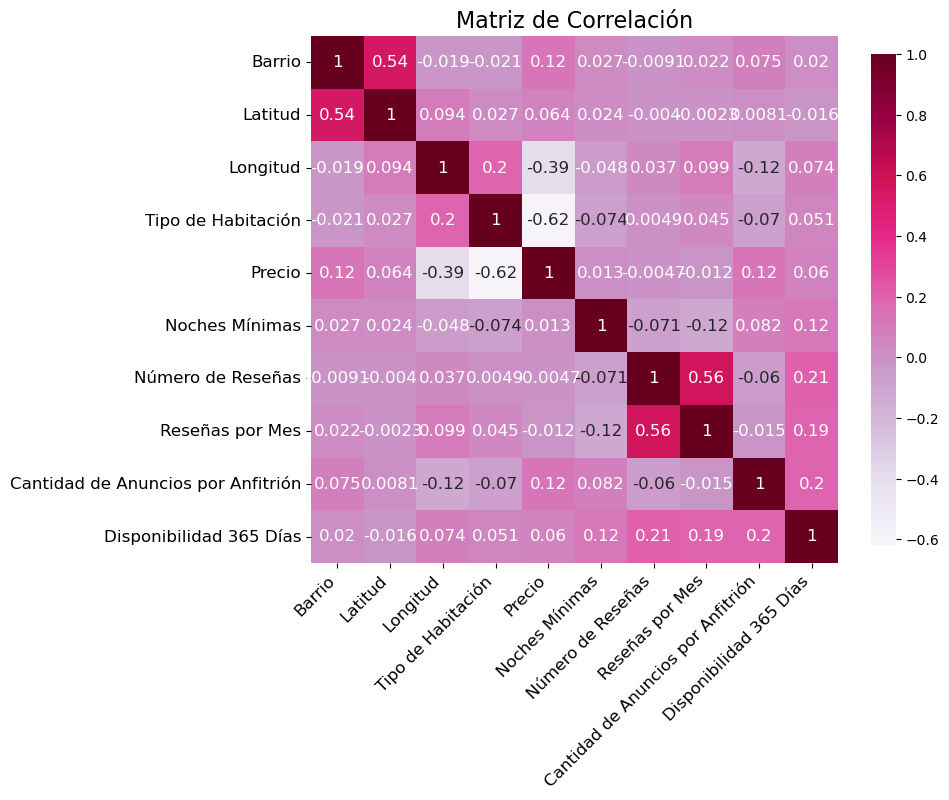

In [11]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# MATRIZ DE CORRELACIÓN
# Usar las columnas codificadas en lugar de las originales
arrests = df_final[["neighbourhood_group_encoded", "latitude", "longitude", 
                    "room_type_encoded", "price", "minimum_nights", 
                    "number_of_reviews", "reviews_per_month", 
                    "calculated_host_listings_count", "availability_365"]]

# Renombrar las columnas del DataFrame para que tengan mejor formato en español
arrests_renamed = arrests.rename(columns={
    "neighbourhood_group_encoded": "Barrio",
    "latitude": "Latitud",
    "longitude": "Longitud",
    "room_type_encoded": "Tipo de Habitación",
    "price": "Precio",
    "minimum_nights": "Noches Mínimas",
    "number_of_reviews": "Número de Reseñas",
    "reviews_per_month": "Reseñas por Mes",
    "calculated_host_listings_count": "Cantidad de Anuncios por Anfitrión",
    "availability_365": "Disponibilidad 365 Días"
})

# Calcular la matriz de correlación
correlation = arrests_renamed.corr()

# Graficar la matriz de correlación con las nuevas etiquetas en español
plt.figure(figsize=(8.5, 8.5))

# Graficar la matriz de correlación con la paleta degradada
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="PuRd", 
            cbar_kws={"shrink": .75}, annot_kws={"size": 12})  # Aumentar tamaño de las anotaciones

# Personalizar título y ejes
plt.title('Matriz de Correlación', fontsize=16)  # Aumentar tamaño del título
plt.xticks(rotation=45, ha='right', fontsize=12)  # Aumentar tamaño de etiquetas en eje X
plt.yticks(fontsize=12)  # Aumentar tamaño de etiquetas en eje Y

plt.show()


#### Ejercicio 3 
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [ ]:
#Resolver acá

#### Ejercicio 4 
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

In [ ]:
#Resolver acá

#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

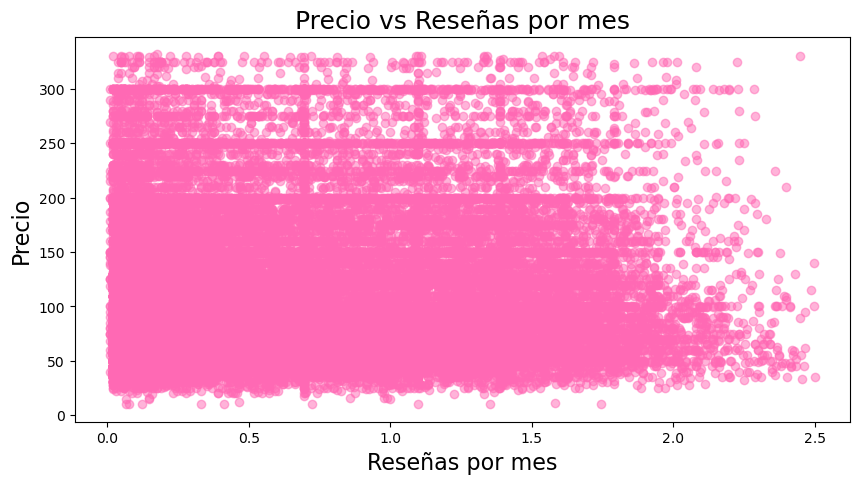

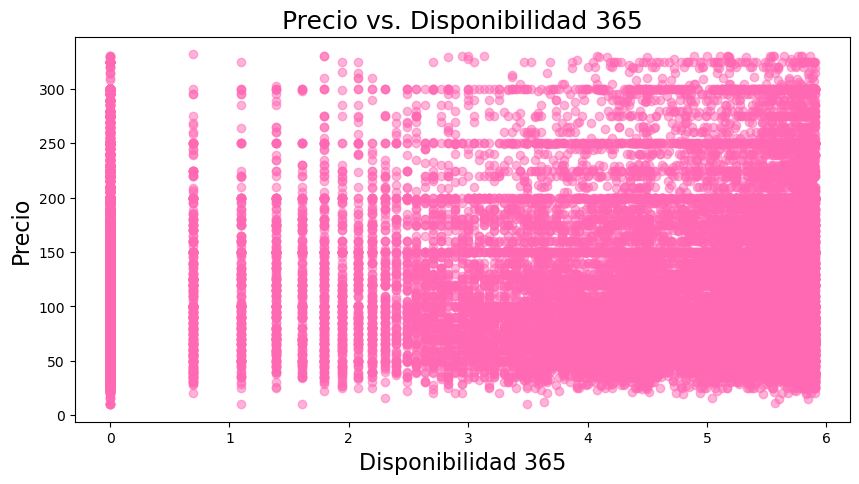

In [10]:
# Resolver acá

# Scatter Plot 1: Precio vs Número de Reseñas
plt.figure(figsize=(10, 5))
plt.scatter(df_final['log_reviews_per_month'], df_final['price'], alpha=0.5, color = "hotpink")
plt.title('Precio vs Reseñas por mes', fontsize=18)
plt.xlabel('Reseñas por mes', fontsize=16)
plt.ylabel('Precio', fontsize=16)
plt.show()

# Scatter Plot 2: Latitud vs. Precio
plt.figure(figsize=(10, 5))
plt.scatter(df_final["log_availability_365"], df_final["price"], alpha=0.5, color='hotpink')
plt.title("Precio vs. Disponibilidad 365", fontsize=18)
plt.xlabel('Disponibilidad 365', fontsize=16)
plt.ylabel('Precio', fontsize=16)
plt.show()

#COMENTAR RESULTADOS

#introducción a la visualiación de datoss schawanisc , 

#### Ejercicio 6 
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

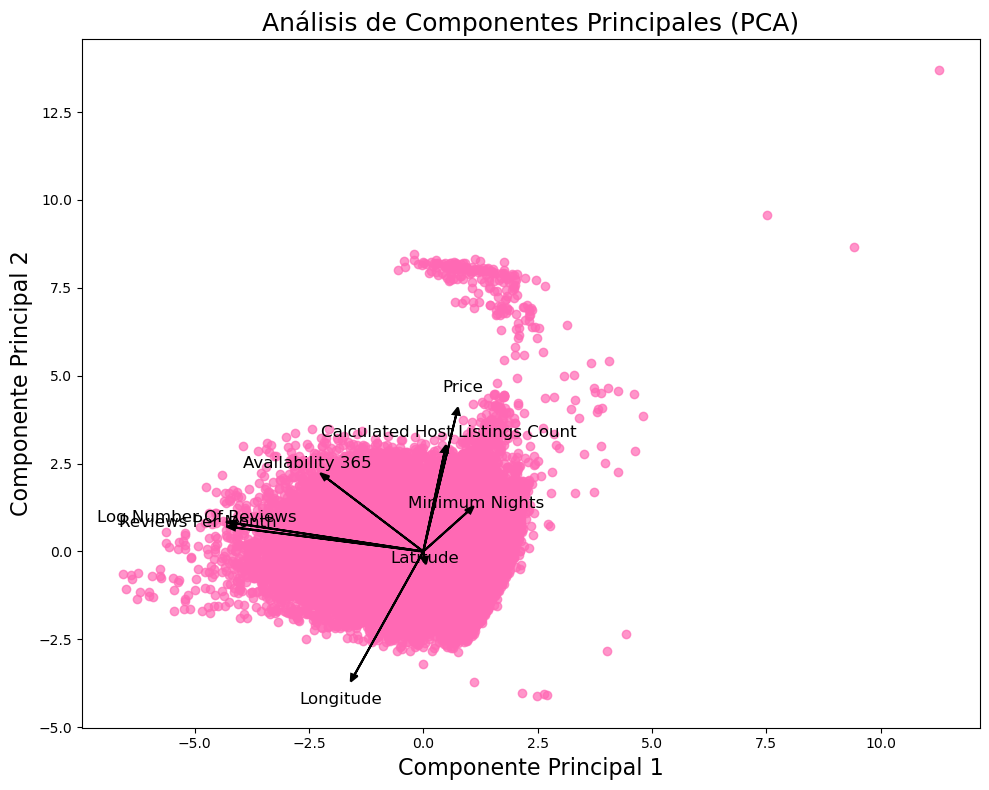

Porcentaje de varianza explicada por los dos primeros componentes: 40.58%
Vectores de Carga:
                         latitude  longitude     price  minimum_nights  \
Componente Principal 1  0.003954  -0.231678  0.110977        0.149539   
Componente Principal 2 -0.024687  -0.540427  0.599440        0.174095   

                        log_number_of_reviews  reviews_per_month  \
Componente Principal 1              -0.633534          -0.632440   
Componente Principal 2               0.124000           0.104554   

                        calculated_host_listings_count  availability_365  
Componente Principal 1                        0.071415         -0.324323  
Componente Principal 2                        0.434242          0.320652  


In [8]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionar las variables numéricas
columns_to_analyze = ['latitude', 'longitude', 'price', 'minimum_nights', 
                      'log_number_of_reviews', 'reviews_per_month', 
                      'calculated_host_listings_count', 'availability_365']

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_final[columns_to_analyze])

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Graficar los componentes principales (sin dividir por barrios)
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, color = "hotpink")
plt.title('Análisis de Componentes Principales (PCA)', fontsize=18)
plt.xlabel('Componente Principal 1', fontsize=16)
plt.ylabel('Componente Principal 2', fontsize=16)

# Agregar flechas para las variables (vectores de carga)
loading_vectors = pca.components_.T  # Transponer los componentes para obtener las columnas

# Multiplicar los loadings por un factor más grande para que las flechas sean más visibles
scaling_factor = 6.5 # Incrementar el tamaño de las flechas para mayor claridad
for i, var in enumerate(columns_to_analyze):
    # Dibujar las flechas en color negro
    plt.arrow(0, 0, loading_vectors[i, 0] * scaling_factor, loading_vectors[i, 1] * scaling_factor, 
              color='black', head_width=0.15, head_length=0.20, linewidth = 1.5)
    # Etiquetar las variables
    plt.text(loading_vectors[i, 0] * scaling_factor * 1.2, 
             loading_vectors[i, 1] * scaling_factor * 1.2, 
             var.replace('_', ' ').title(), color='black', fontsize=12, ha='center', va='center')

plt.tight_layout()  # Mejorar el ajuste de la figura
plt.show()

# Porcentaje de varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
print(f"Porcentaje de varianza explicada por los dos primeros componentes: {varianza_explicada.sum() * 100:.2f}%")

# Vectores de carga
loading_vectors = pca.components_  # Cada fila corresponde a un CP y cada columna a una variable

# Mostrar los vectores de carga de forma más clara
loadings_df = pd.DataFrame(loading_vectors, columns=columns_to_analyze, 
                            index=[f'Componente Principal {i+1}' for i in range(len(loading_vectors))])
print("Vectores de Carga:\n", loadings_df)



C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2551380351.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carga', y='Variable', data=loadings_cp1_df, palette='coolwarm')


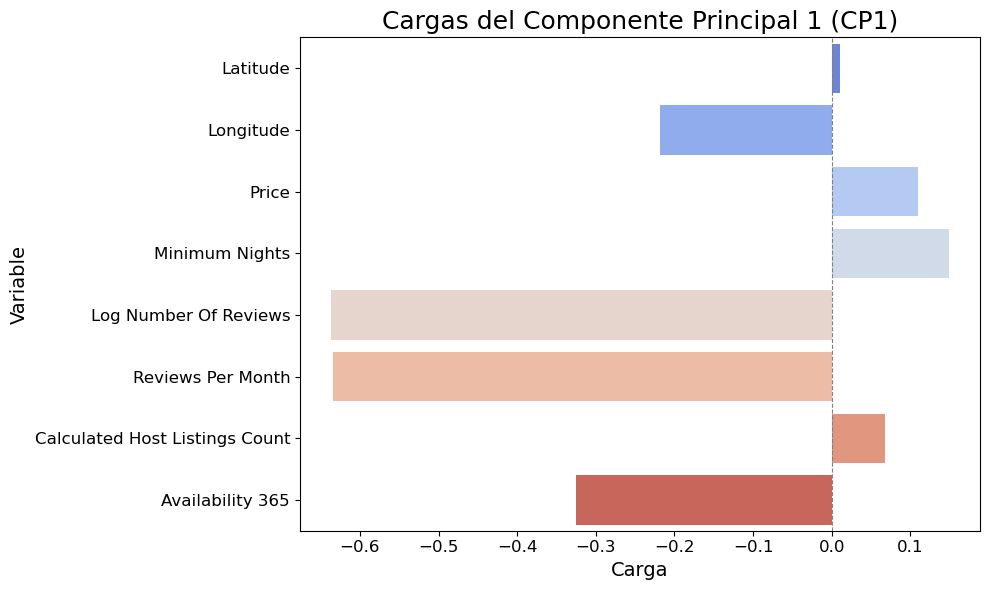

C:\Users\usuario\AppData\Local\Temp\ipykernel_23664\2551380351.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carga', y='Variable', data=loadings_cp2_df, palette='viridis')


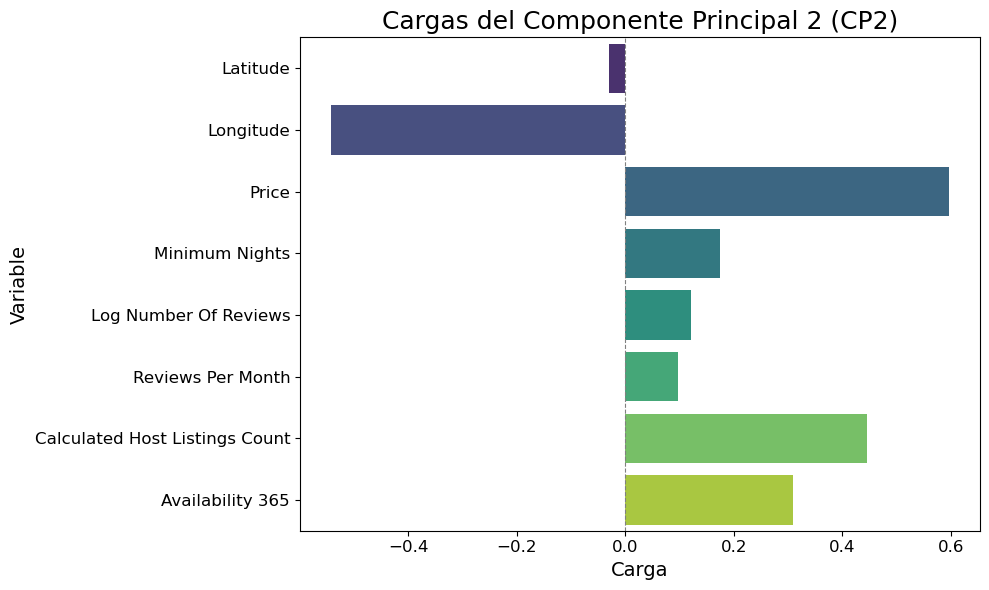

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Resultados de las cargas del Componente Principal 1 (CP1)
loadings_cp1 = {
    'Variable': [
        'latitude', 'longitude', 'price', 'minimum_nights', 
        'log_number_of_reviews', 'reviews_per_month', 
        'calculated_host_listings_count', 'availability_365'
    ],
    'Carga': [
        0.0100, -0.2182, 0.1090, 0.1491, 
        -0.6369, -0.6344, 0.0677, -0.3248
    ]
}

# Crear un DataFrame
loadings_cp1_df = pd.DataFrame(loadings_cp1)

# Modificar los nombres de las variables
loadings_cp1_df['Variable'] = loadings_cp1_df['Variable'].str.replace('_', ' ').str.title()

# Crear un gráfico de barras para el Componente Principal 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=loadings_cp1_df, palette='coolwarm')

# Personalizar el gráfico
plt.title('Cargas del Componente Principal 1 (CP1)', fontsize=18)  # Agrandar el título
plt.xlabel('Carga', fontsize=14)  # Agrandar el texto del eje x
plt.ylabel('Variable', fontsize=14)  # Agrandar el texto del eje y
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # Línea en x=0
plt.xticks(fontsize=12)  # Agrandar etiquetas del eje x
plt.yticks(fontsize=12)  # Agrandar etiquetas del eje y
plt.tight_layout()  # Mejorar el ajuste de la figura
plt.show()

# Resultados de las cargas del Componente Principal 2 (CP2)
loadings_cp2 = {
    'Variable': [
        'latitude', 'longitude', 'price', 'minimum_nights', 
        'log_number_of_reviews', 'reviews_per_month', 
        'calculated_host_listings_count', 'availability_365'
    ],
    'Carga': [
        -0.0292, -0.5426, 0.5971, 0.1743, 
        0.1208, 0.0976, 0.4451, 0.3093
    ]
}

# Crear un DataFrame
loadings_cp2_df = pd.DataFrame(loadings_cp2)

# Modificar los nombres de las variables
loadings_cp2_df['Variable'] = loadings_cp2_df['Variable'].str.replace('_', ' ').str.title()

# Crear un gráfico de barras para el Componente Principal 2
plt.figure(figsize=(10, 6))
sns.barplot(x='Carga', y='Variable', data=loadings_cp2_df, palette='viridis')

# Personalizar el gráfico
plt.title('Cargas del Componente Principal 2 (CP2)', fontsize=18)  # Agrandar el título
plt.xlabel('Carga', fontsize=14)  # Agrandar el texto del eje x
plt.ylabel('Variable', fontsize=14)  # Agrandar el texto del eje y
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')  # Línea en x=0
plt.xticks(fontsize=12)  # Agrandar etiquetas del eje x
plt.yticks(fontsize=12)  # Agrandar etiquetas del eje y
plt.tight_layout()  # Mejorar el ajuste de la figura
plt.show()


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8 
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [6]:
#Resolver acá

Error Cuadrático Medio (MSE): 2290.641685661635


#### Ejercicio 9 
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
#Resolver acá